# Monthly Report Feb. 2018 

In [21]:

import sqlite3
import pandas as pd
from pandas import DataFrame, Series

conn_sales = sqlite3.connect('Sales.db')

In [22]:
# Global Parameter

year_val = 2018
mon_val = 2


# 총괄 판매량 

In [23]:
sql_sales = '''
                select year, month, sum(amount) as 'Total'
                from sales
                where year = {0} and month = {1};
'''.format(year_val, mon_val)
DF_Tsales = pd.read_sql_query(sql_sales, conn_sales)
DF_Tsales = DF_Tsales.set_index(['year', 'month'])

sql_lsales = """
                select year, month, sum(amount) as 'Lager'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 21 or cat2 = 61);
""".format(year_val, mon_val)
DF_Lsales = pd.read_sql_query(sql_lsales, conn_sales)
DF_Lsales = DF_Lsales.set_index(['year', 'month'])

sql_asales = """
                select year, month, sum(amount) as 'Ale'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 22 or cat2 = 62);
""".format(year_val, mon_val)
DF_Asales = pd.read_sql_query(sql_asales, conn_sales)
DF_Asales = DF_Asales.set_index(['year', 'month'])
sql_fsales = """
                select year, month, sum(amount) as 'Food'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 31 or cat2 = 30);
""".format(year_val, mon_val)
DF_Fsales = pd.read_sql_query(sql_fsales, conn_sales)
DF_Fsales = DF_Fsales.set_index(['year', 'month'])

sql_csales = """
                select year, month, sum(amount) as 'Chicken'
                from sales
                where (year = {0} and month = {1})
                and (cat2 = 35 or cat2 = 36 or cat2 = 37);
""".format(year_val, mon_val)
DF_Csales = pd.read_sql_query(sql_csales, conn_sales)
DF_Csales = DF_Csales.set_index(['year', 'month'])

DF_sales = pd.concat([DF_Tsales, DF_Lsales, DF_Asales, DF_Fsales, DF_Csales], axis=1)
DF_sales.T

year,2018
month,2
Total,25373200
Lager,6657538
Ale,9440026
Food,5418119
Chicken,3857517


In [24]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [25]:
matplotlib.matplotlib_fname()

u'/Users/kwool/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [26]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

In [27]:
#font_name = matplotlib.font_manager.FontProperties(fname=u"c:/Windows/Fonts/rix고딕M.ttf").get_name()
#matplotlib.rc('font', family=font_name)

In [66]:

plt.rcParams["font.family"] = 'AppleMyungjo'
#plt.rcParams["font.family"] = font_name

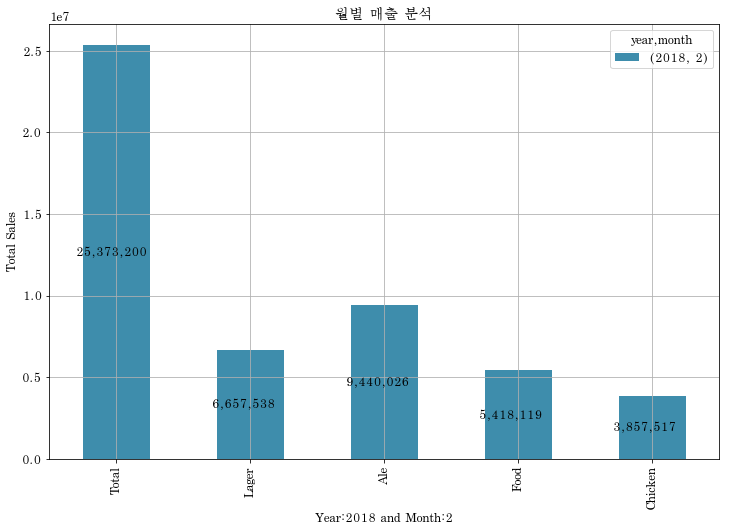

In [67]:

fig = plt.figure()
my_colors = ['#3E8DAC', 'g', '#FEC200','y','r']
ax = DF_sales.T.plot.bar(stacked=False, figsize=(12,8), grid=True, colors=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'월별 매출 분석')

ax.set_xlabel('Year:{0} and Month:{1}'.format(year_val, mon_val))
ax.set_ylabel('Total Sales')


labels = []

for i in DF_sales.index:
    for j in DF_sales.columns:
        value_str = u"{:<12,}".format(int(DF_sales.loc[i][j])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('1-1-Sales-Total.png')
plt.show()




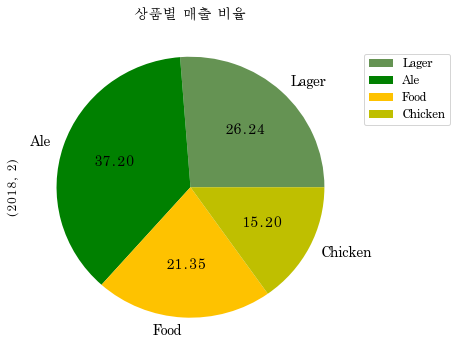

In [68]:
fig = plt.figure()

my_colors = ['#659353', 'g', '#FEC200','y']
ax = DF_sales[['Lager','Ale','Food','Chicken']].T.plot.\
    pie(subplots=True, figsize=(6,6), autopct='%.2f', fontsize=14, colors=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'상품별 매출 비율')
    
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
fig = ax[0].get_figure()
fig.savefig('1-2-Sales-Rate.png')
plt.show()

# Food Sales

In [30]:
sql_food = """
            select year, month, pname, amount as sales
            from sales
            where cat1 = 3 and year = {0} and month = {1};
""".format(year_val, mon_val)
DF_food = pd.read_sql_query(sql_food, conn_sales)

DF_food_graph = DF_food.set_index('pname')
DF_food_graph


,year,month,sales
pname,,,
콜라,2018,2,138000
사이다,2018,2,168000
뻘건감자,2018,2,460000
촉촉오징어땅콩,2018,2,980000
골빔면,2018,2,315000
허연감자,2018,2,836119
스팸튀김,2018,2,198000
앵그리버드,2018,2,1353557
크리스피텐더,2018,2,1200000


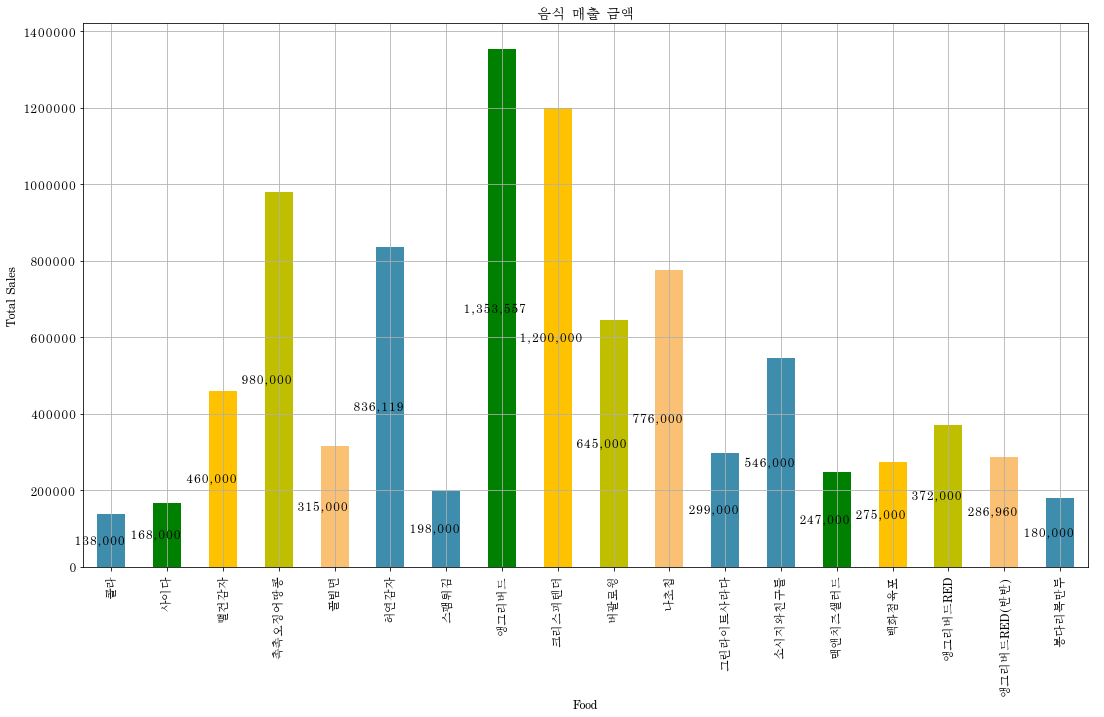

In [69]:
fig = plt.figure()
my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174']
ax = DF_food_graph['sales'].plot.bar(stacked=False, figsize=(18,10), grid=True, colors=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'음식 매출 금액')

ax.set_xlabel('Food')
ax.set_ylabel('Total Sales')

labels = []
for i in DF_food_graph.index:
        value_str = u"{:<12,}".format(int(DF_food_graph.loc[i]['sales'])) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('1-3-Food-Sales-Total.png')
plt.show()

# Beer Sales

In [70]:
sql_beer = """
            select year, month, pname, amount as sales
            from sales
            where year = {0} and month = {1} and cat1 = 2 ;
""".format(year_val, mon_val)
DF_BS1 = pd.read_sql_query(sql_beer, conn_sales)
sql_beer = """
            select year, month, pname, amount as sales
            from sales
            where year = {0} and month = {1} and cat1 = 6 ;
""".format(year_val, mon_val)
DF_BS2 = pd.read_sql_query(sql_beer, conn_sales)
DF_BS1 = DF_BS1.set_index('pname')
DF_BS2 = DF_BS2.set_index('pname')

#DF_BS1, DF_BS2

In [71]:
DF_BS1.loc[u'생활밀착', 'sales'] += DF_BS2.loc[u'CAN 생활밀착']['sales']
DF_BS1.loc[u'놀라운에일', 'sales'] += DF_BS2.loc[u'CAN 놀라운']['sales']
DF_BS1.loc[u'레드락IPA', 'sales'] += DF_BS2.loc[u'CAN 레드락IPA']['sales']
DF_BS1.loc[u'레드락라거', 'sales'] += DF_BS2.loc[u'CAN 진짜500']['sales']
DF_BS1.loc[u'모카스타우트', 'sales'] += DF_BS2.loc[u'CAN 모카스타우트']['sales']
DF_BS1.loc[u'강남페일에일', 'sales'] += DF_BS2.loc[u'CAN 강남']['sales']
DF_BS1.loc[u'걸작IPA', 'sales'] += DF_BS2.loc[u'CAN 걸작IPA']['sales']
DF_BS1.loc[u'일상탈출', 'sales'] += DF_BS2.loc[u'CAN 일상탈출']['sales']
DF_BS1.loc[u'설레임', 'sales'] += DF_BS2.loc[u'CAN 설레임']['sales']
DF_BS1.loc[u'하와이안골든에일', 'sales'] += DF_BS2.loc[u'CAN 하와이안골든에일']['sales']

DF_BS1

,year,month,sales
pname,,,
샘플러5종,2018,2,1304524
생활밀착,2018,2,1387676
놀라운에일,2018,2,1770721
레드락IPA,2018,2,212500
레드락라거,2018,2,6657538
모카스타우트,2018,2,1518744
슬로우IPA,2018,2,0
강남페일에일,2018,2,1515328
걸작IPA,2018,2,692000


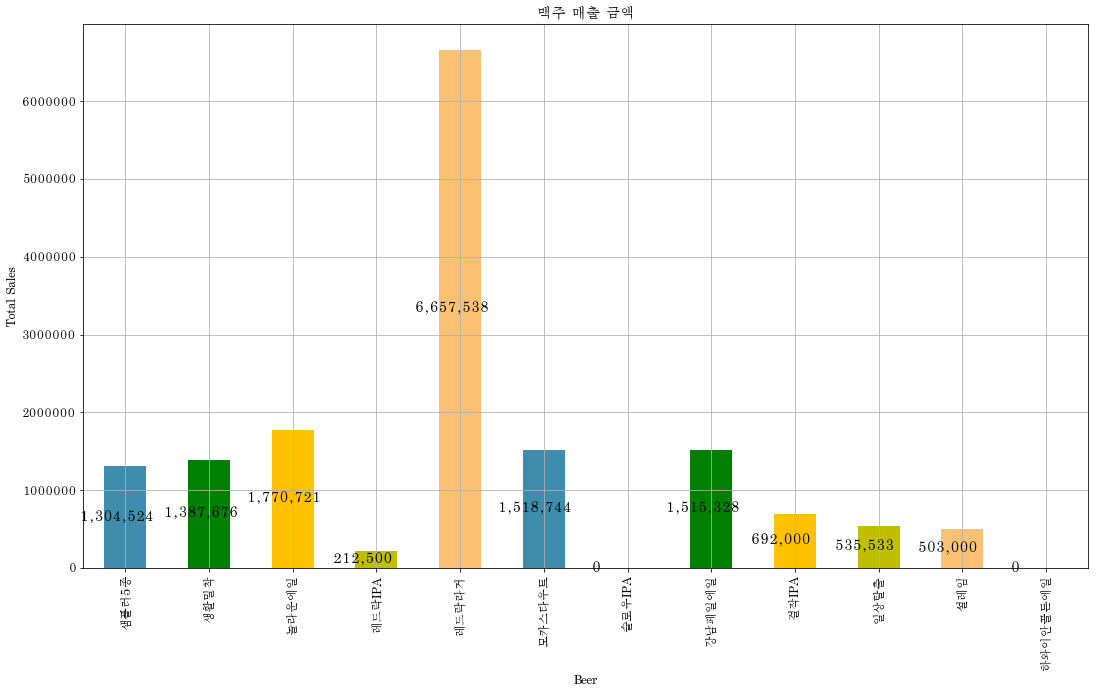

In [72]:
fig = plt.figure()
my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174']
ax = DF_BS1['sales'].plot.bar(stacked=False, figsize=(18,10), grid=True, colors=my_colors)

plt.rcParams['font.size'] = 12
plt.title(u'맥주 매출 금액')

ax.set_xlabel('Beer')
ax.set_ylabel('Total Sales')

labels = []
for i in DF_BS1.index:
        value_str = u"{:<12,}".format(int(DF_BS1.loc[i]['sales'])) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=14)

fig  = ax.get_figure()
fig.savefig('1-4-Beer-Sales.png')
plt.show()

# Sell/Buy

## Total Sell/Buy 

In [ ]:
# 총매출 : 음식매입 : 맥주매입


# Food Sales/Buy

In [32]:
# -------------------------------------------------------------------------
## Angry + RED + Half and Half
DF_food.loc[7, 'sales'] += DF_food.loc[15,'sales'] + DF_food.loc[16, 'sales']
DF_food = DF_food.drop([15,16])


In [33]:

# -----------------------------------------------------------------------------
# [0] 100743 콜라
indno = 0
sql_stmt = "select sum(total) from orderall where year={0} and month={1} and sku=100743".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [1] 100744 사이다
indno = 1
sql_stmt = "select sum(total) from orderall where year={0} and month={1} and sku=100744".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [2] 251901 빨간감자 + 양파드레싱 + 케찹
indno = 2
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=251901 or sku=215140 or sku=160016)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [3] 오징어 + 땅콩
indno = 3
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=232931 or sku = 206578)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [4] 비빔면 + 골뱅이
indno = 4
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=171838 or sku = 163815)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [5] 251902 허연감자 + 양파드레싱 + 케찹
indno = 5
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=251902 or sku=215140 or sku=160016)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# -----------------------------------------------------------------------------
# [6] 118232 Spam
indno = 6
sql_stmt = "select sum(total) from orderall where year={0} and month={1} and sku=118232".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [7] Angry + [15] Red + [16] H and H
# [7] 앵그리 + 파우더 + 레드소스 
indno = 7
#sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=424782 or sku=166412 or sku=247491 or sku=145970)".format(year_val, mon_val)
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=424782 or sku=166412 or sku=247491)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [8] Krispy + 웨지감자 
indno = 8
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=424783 or sku=140440)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [9] Buff 
indno = 9
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=115722 or sku=140440)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [10] Nacho + 살사소스 + 치즈소스
indno = 10
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=116709 or sku = 115364 or sku = 119863)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [11] Green Light Salad
indno = 11
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=169394)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [12] Sausage + Egg
indno = 12
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=176689 or sku=401354)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


# -----------------------------------------------------------------------------
# [13] Mac and Cheese + 케이준드레싱 + 샐러드믹스
indno = 13
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=124531 or sku=215139 or sku=169394)".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total



# -----------------------------------------------------------------------------
# [14] 64 + 땅콩 + 건포도
indno = 14
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=201934 or sku=206578 or sku=242910 )".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total

# [15],[16] drop

# -----------------------------------------------------------------------------
# [17] dimsum
indno = 17
sql_stmt = "select sum(total) from orderall where (year={0} and month={1}) and (sku=140440 )".format(year_val, mon_val)
cursor = conn_sales.cursor()
cursor.execute(sql_stmt)
tuples = cursor.fetchone()
total = tuples[0]
DF_food.loc[indno, 'buy'] = total


In [34]:
DF_food_graph2 = DF_food.set_index('pname')
DF_food_graph2 = DF_food_graph2[['sales','buy']]
DF_food_graph2

,sales,buy
pname,,
콜라,138000,35904.0
사이다,168000,30782.0
뻘건감자,460000,262922.0
촉촉오징어땅콩,980000,365000.0
골빔면,315000,137280.0
허연감자,836119,381194.0
스팸튀김,198000,77000.0
앵그리버드,2012517,744810.0
크리스피텐더,1200000,534292.0


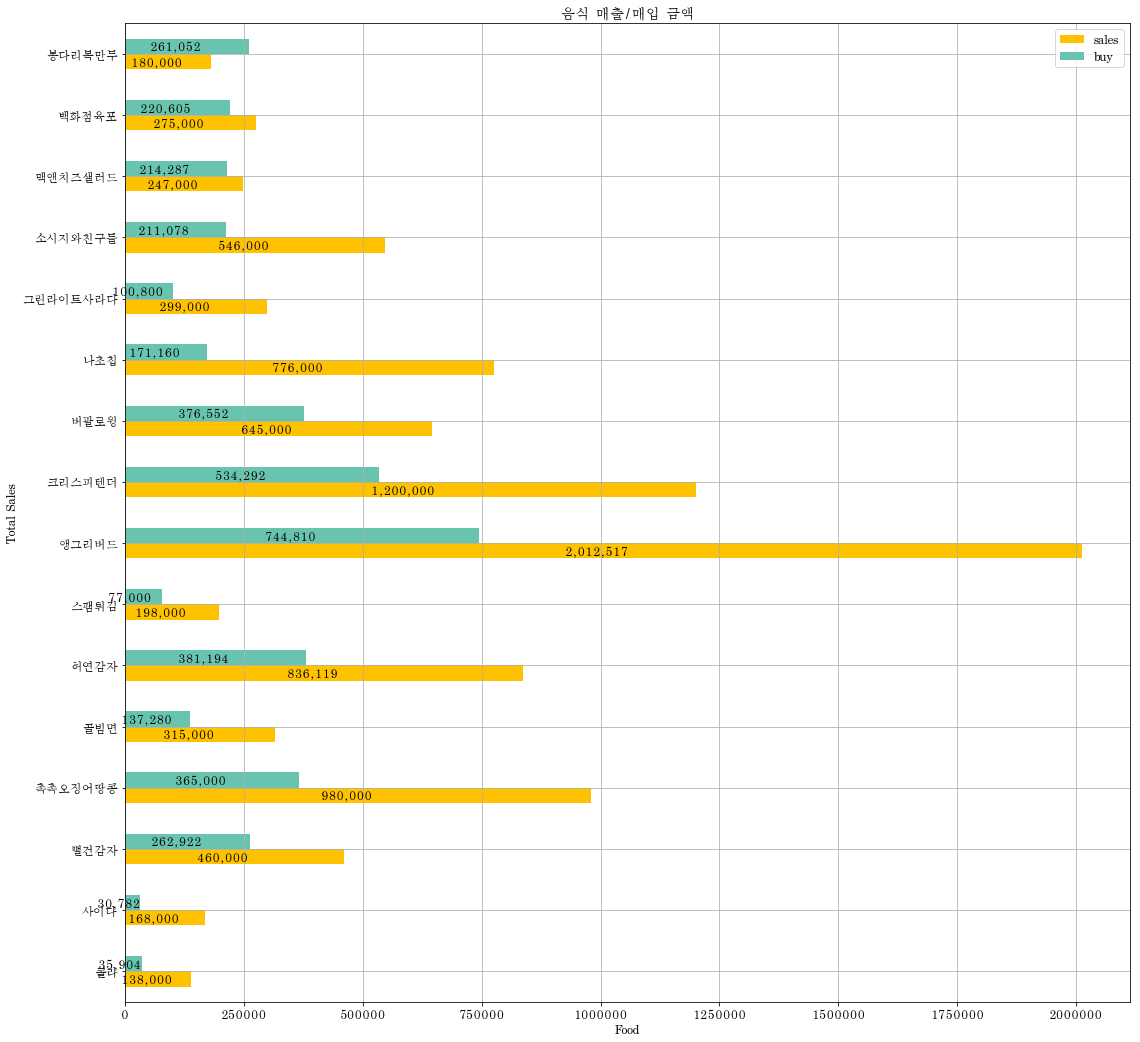

In [43]:
fig = plt.figure()
#my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174','#25A2A6','#68C4AF']
my_colors = ['#FEC200','#68C4AF']

ax = DF_food_graph2.plot.barh(stacked=False, figsize=(18,18), grid=True, colors=my_colors)

plt.rcParams["font.family"] = 'AppleMyungjo'
#plt.rcParams["font.family"] = font_name
plt.rcParams['font.size'] = 12
plt.title(u'음식 매출/매입 금액')

ax.set_xlabel('Food')
ax.set_ylabel('Total Sales')

labels = []
for j in DF_food_graph2.columns:
    for i in DF_food_graph2.index:
        value_str = u"{:<12,}".format(int(DF_food_graph2.loc[i][j])) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('1-5-Food-SalesandBuy.png')
plt.show()

In [36]:
DF_food['prate'] = 100 - (DF_food['buy']/DF_food['sales'] * 100)
DF_food_graph3 = DF_food.set_index('pname')
DF_food_graph3 = DF_food_graph3.drop(u'봉다리복만두')
DF_food_graph3


,year,month,sales,buy,prate
pname,,,,,
콜라,2018,2,138000,35904.0,73.982609
사이다,2018,2,168000,30782.0,81.677381
뻘건감자,2018,2,460000,262922.0,42.843043
촉촉오징어땅콩,2018,2,980000,365000.0,62.755102
골빔면,2018,2,315000,137280.0,56.419048
허연감자,2018,2,836119,381194.0,54.409121
스팸튀김,2018,2,198000,77000.0,61.111111
앵그리버드,2018,2,2012517,744810.0,62.991120
크리스피텐더,2018,2,1200000,534292.0,55.475667


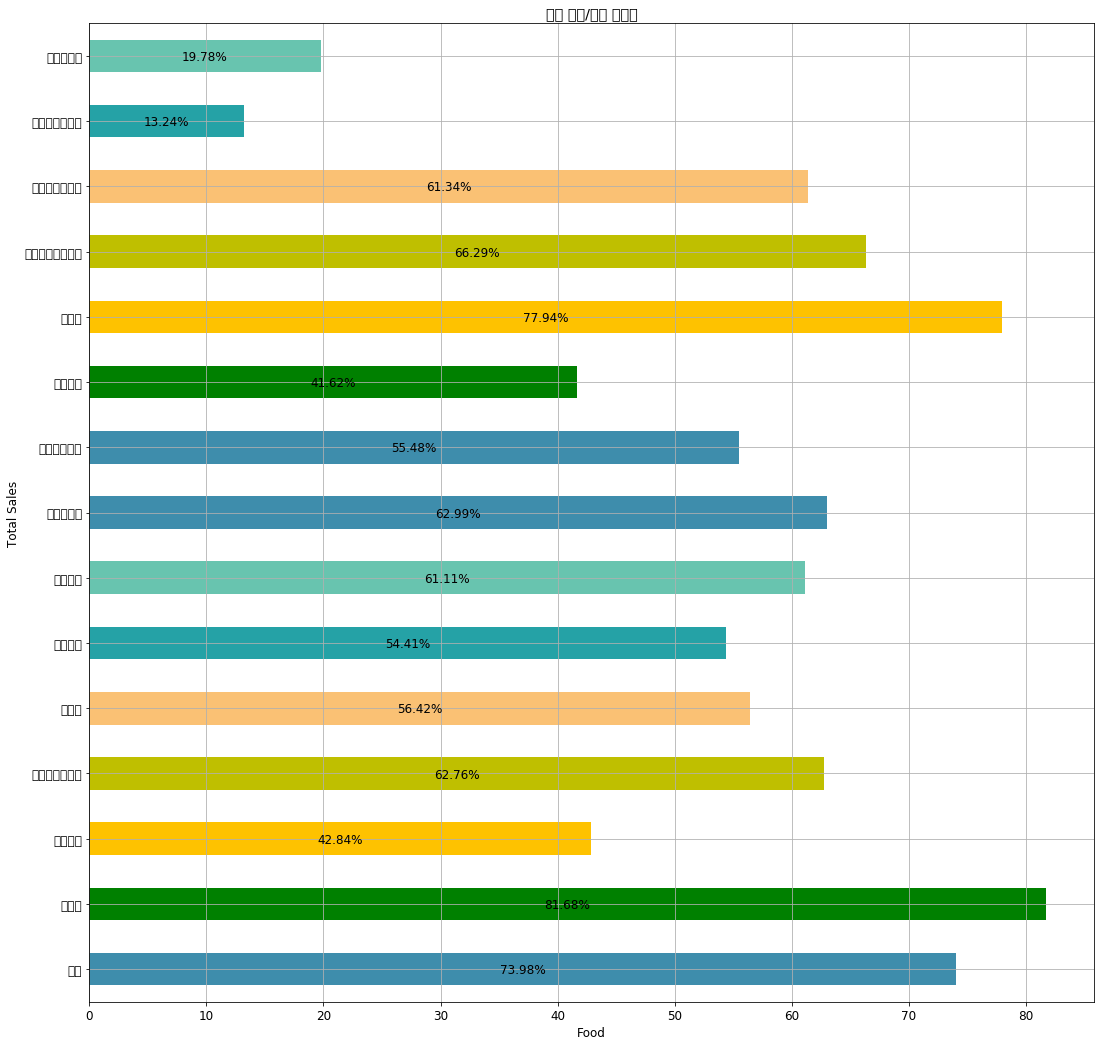

In [37]:
fig = plt.figure()
my_colors = ['#3E8DAC', 'g', '#FEC200','y','#FAC174','#25A2A6','#68C4AF']

ax = DF_food_graph3['prate'].plot.barh(stacked=False, figsize=(18,18), grid=True, colors=my_colors)

plt.rcParams["font.family"] = 'AppleMyungjo'
plt.rcParams["font.family"] = font_name
plt.rcParams['font.size'] = 12
plt.title(u'음식 매입/매출 수익율')

ax.set_xlabel('Food')
ax.set_ylabel('Total Sales')

labels = []
for i in DF_food_graph3.index:
        value_str = "{0:.4}%".format(DF_food_graph3.loc[i]['prate']) 
        labels.append(value_str)
#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('1-6-Food-Prate.png')
plt.show()

# Beer Sales/Buy